## Code for comparing Rg distributions and helical content (by DSSP) for SERF E54x mutant simulations
This script takes ten input text files; for each point mutant (WT, E54A, E54D, E54Q, and E54GLH) simulation, Rg distributions and average helicity were calculated from trajectories using the Soursop module. The resulting data files are read in here. Generates Figure S9.

In [1]:
## import packages ##

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd

In [10]:
## load text files containing Rg values for each frame & average helical DSSP values

WT_Rgs = np.loadtxt('WT_Rgs.txt')
E54A_Rgs = np.loadtxt('E54A_Rgs.txt')
E54D_Rgs = np.loadtxt('E54D_Rgs.txt')
E54Q_Rgs = np.loadtxt('E54Q_Rgs.txt')
E54GLH_Rgs = np.loadtxt('E54GLH_Rgs.txt')

WT_dssp = np.loadtxt('WT_dssp.txt')
E54A_dssp = np.loadtxt('E54A_dssp.txt')
E54D_dssp = np.loadtxt('E54D_dssp.txt')
E54Q_dssp = np.loadtxt('E54Q_dssp.txt')
E54GLH_dssp = np.loadtxt('E54GLH_dssp.txt')

residue = np.arange(1, 69, 1)

aveRgs = [round(np.mean(WT_Rgs), 1), round(np.mean(E54A_Rgs), 1), round(np.mean(E54D_Rgs), 1), round(np.mean(E54Q_Rgs), 1), round(np.mean(E54GLH_Rgs), 1)]

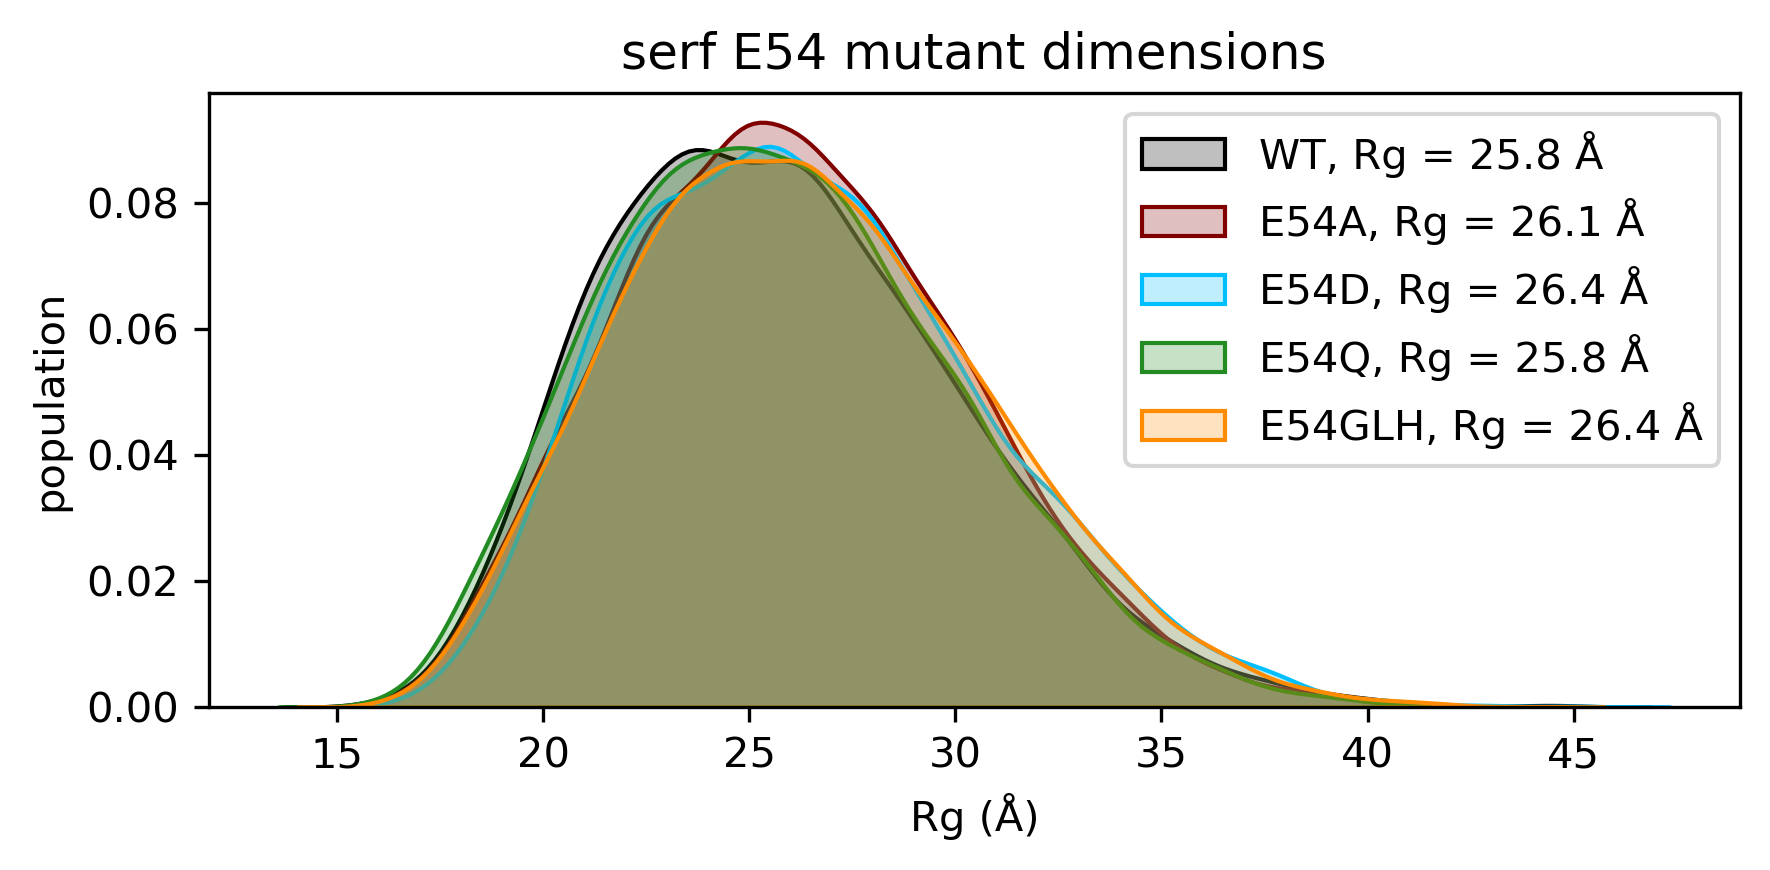

In [4]:
## overlay Rg curves for mutants and WT -- generates Figure S9A ##

plt.figure(figsize = (6, 3), dpi = 300, facecolor = 'w', edgecolor = 'k')

sns.kdeplot(data = WT_Rgs, fill=True, common_norm = False, color="black", label = 'WT, Rg = ' +str(aveRgs[0])+ ' Å')
sns.kdeplot(data = E54A_Rgs, fill=True, common_norm = False, color="maroon", label = 'E54A, Rg = ' +str(aveRgs[1])+ ' Å')
sns.kdeplot(data = E54D_Rgs, fill=True, common_norm = False, color="deepskyblue", label = 'E54D, Rg = ' +str(aveRgs[2])+ ' Å')
sns.kdeplot(data = E54Q_Rgs, fill=True, common_norm = False, color="forestgreen", label = 'E54Q, Rg = ' +str(aveRgs[3])+ ' Å')
sns.kdeplot(data = E54GLH_Rgs, fill=True, common_norm = False, color="darkorange", label = 'E54GLH, Rg = ' +str(aveRgs[4])+ ' Å')

plt.title('serf E54 mutant dimensions')
plt.ylabel('population')
plt.xlabel('Rg (Å)')

#plt.xlim([0, 15])
#plt.ylim([0, 0.5])

plt.tight_layout()
plt.legend(loc = 'best', prop={'size': 10})

## UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_S9A_serf_E54x_Rg.pdf', format = 'pdf', dpi = 300)
plt.show()



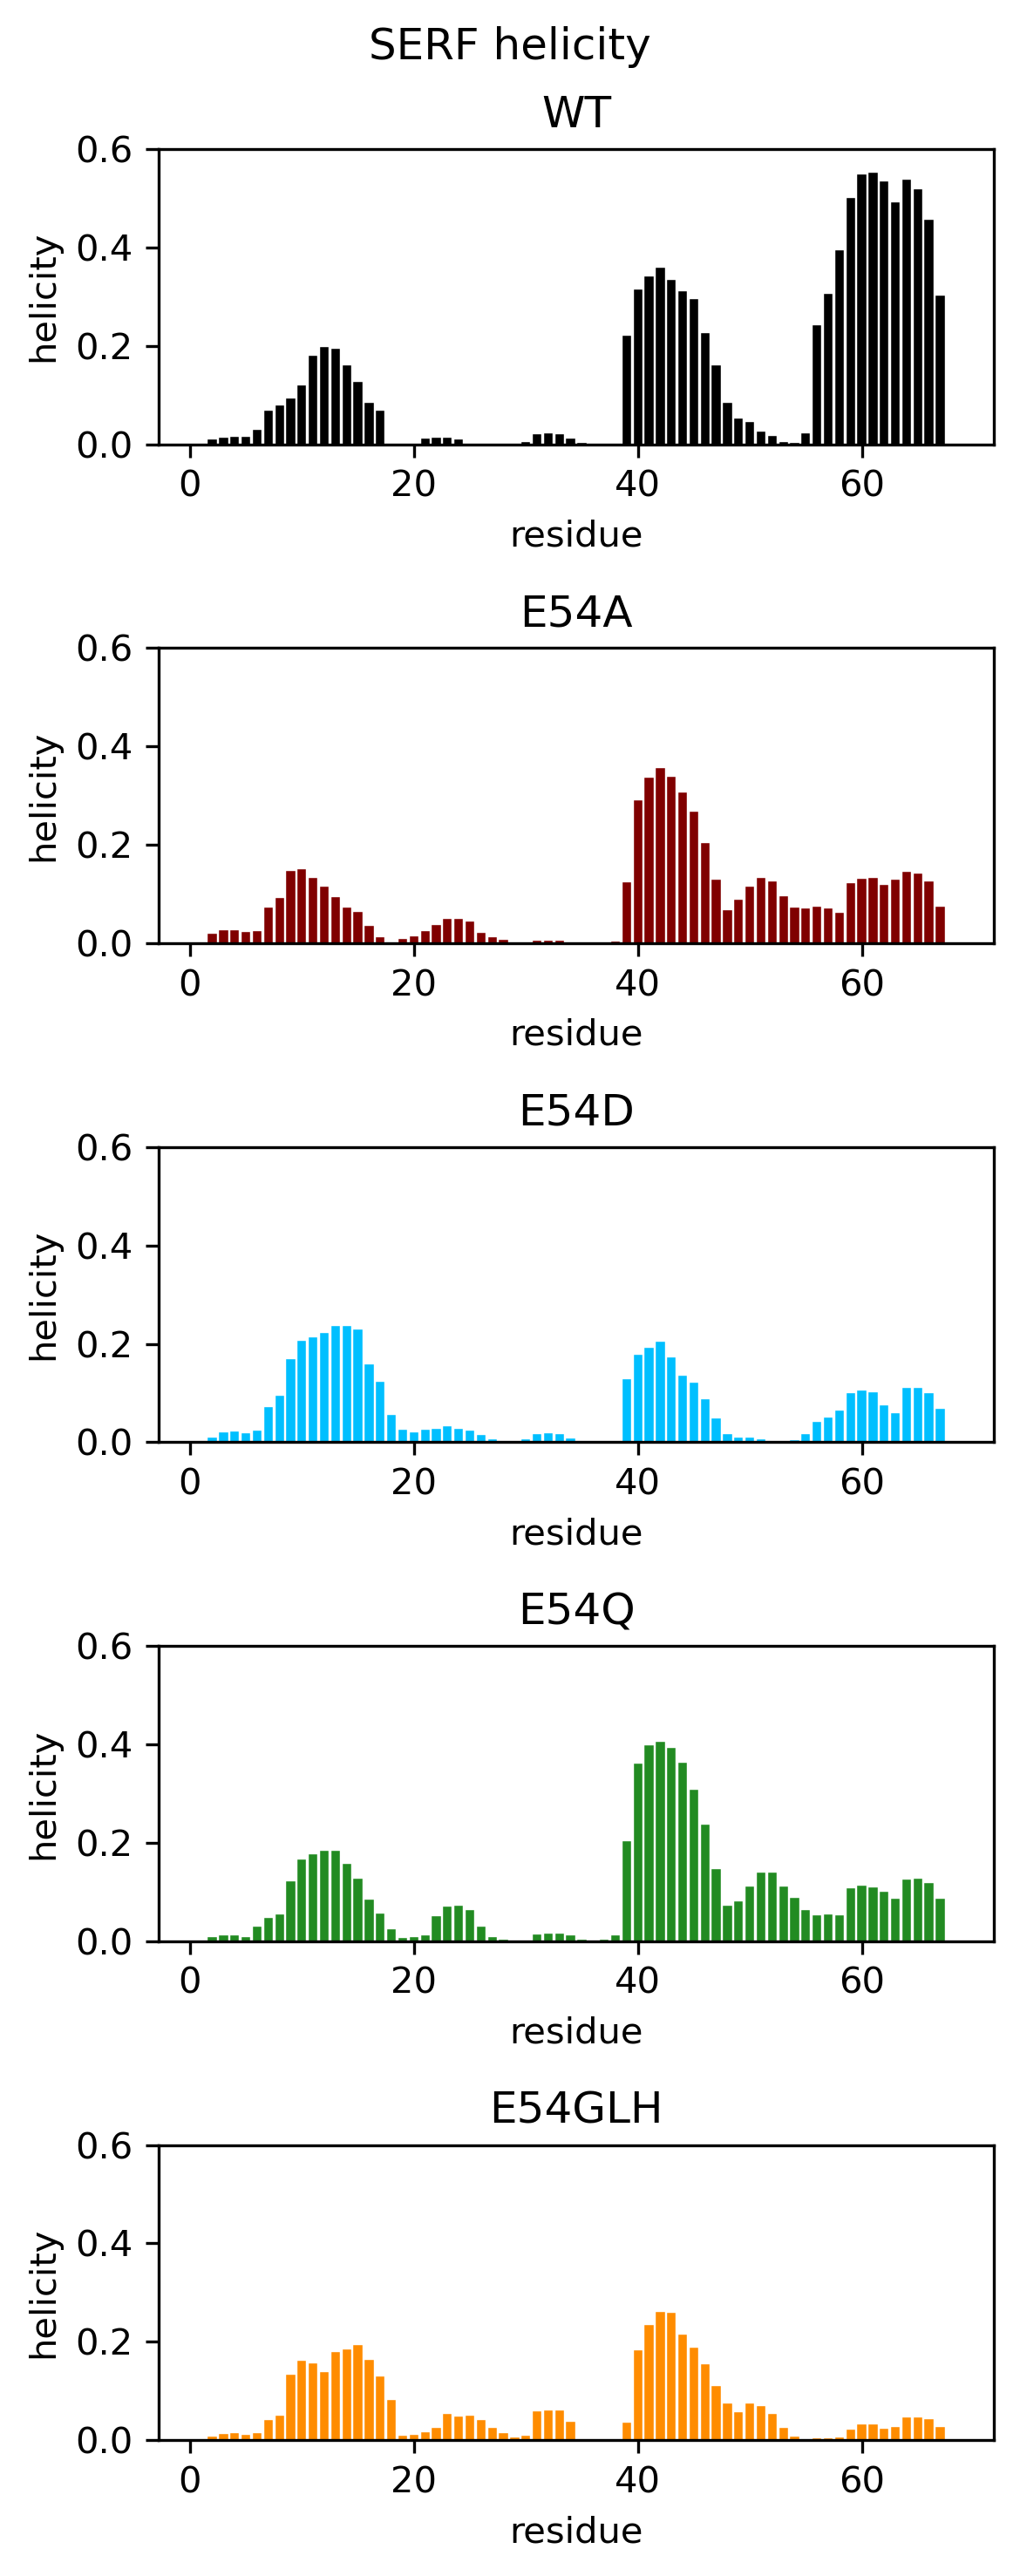

In [11]:
## plot DSSP helicity per residue for full protein sequence - OPTIONAL ##

f, ax = plt.subplots(5, figsize=(4, 10), dpi = 300)

ax[0].bar(residue, WT_dssp, color = 'black', edgecolor = 'white', lw = 0.1)
ax[1].bar(residue, E54A_dssp, color = 'maroon', edgecolor = 'white', lw = 0.1)
ax[2].bar(residue, E54D_dssp, color = 'deepskyblue', edgecolor = 'white', lw = 0.1)
ax[3].bar(residue, E54Q_dssp, color = 'forestgreen', edgecolor = 'white', lw = 0.1)
ax[4].bar(residue, E54GLH_dssp, color = 'darkorange', edgecolor = 'white', lw = 0.1)


ax[0].set_title('WT')
ax[1].set_title('E54A')
ax[2].set_title('E54D')
ax[3].set_title('E54Q')
ax[4].set_title('E54GLH')


ax[0].set_xlabel('residue')
ax[1].set_xlabel('residue')
ax[2].set_xlabel('residue')
ax[3].set_xlabel('residue')
ax[4].set_xlabel('residue')


ax[0].set_ylabel('helicity')
ax[1].set_ylabel('helicity')
ax[2].set_ylabel('helicity')
ax[3].set_ylabel('helicity')
ax[4].set_ylabel('helicity')


ax[0].set_ylim([0, 0.6])
ax[1].set_ylim([0, 0.6])
ax[2].set_ylim([0, 0.6])
ax[3].set_ylim([0, 0.6])
ax[4].set_ylim([0, 0.6])

#plt.xlim([0, 15])
#plt.ylim([0, 0.5])

plt.suptitle('SERF helicity')

plt.tight_layout()

## UNCOMMENT below to save figure as PDF
#plt.savefig('serf_dssp_E54x_FULL.pdf', format = 'pdf', dpi = 300)
plt.show()

In [12]:
## turn string of residues from ss into list ##

resList = 'MARGNQRDLARQKNLKKQKDMAKNQKKSGDPKKRMESDAEILRQKQAAADARREAEKLEKLKAEKTRR'
resIDs_to_list = list(resList.replace(" ", ""))

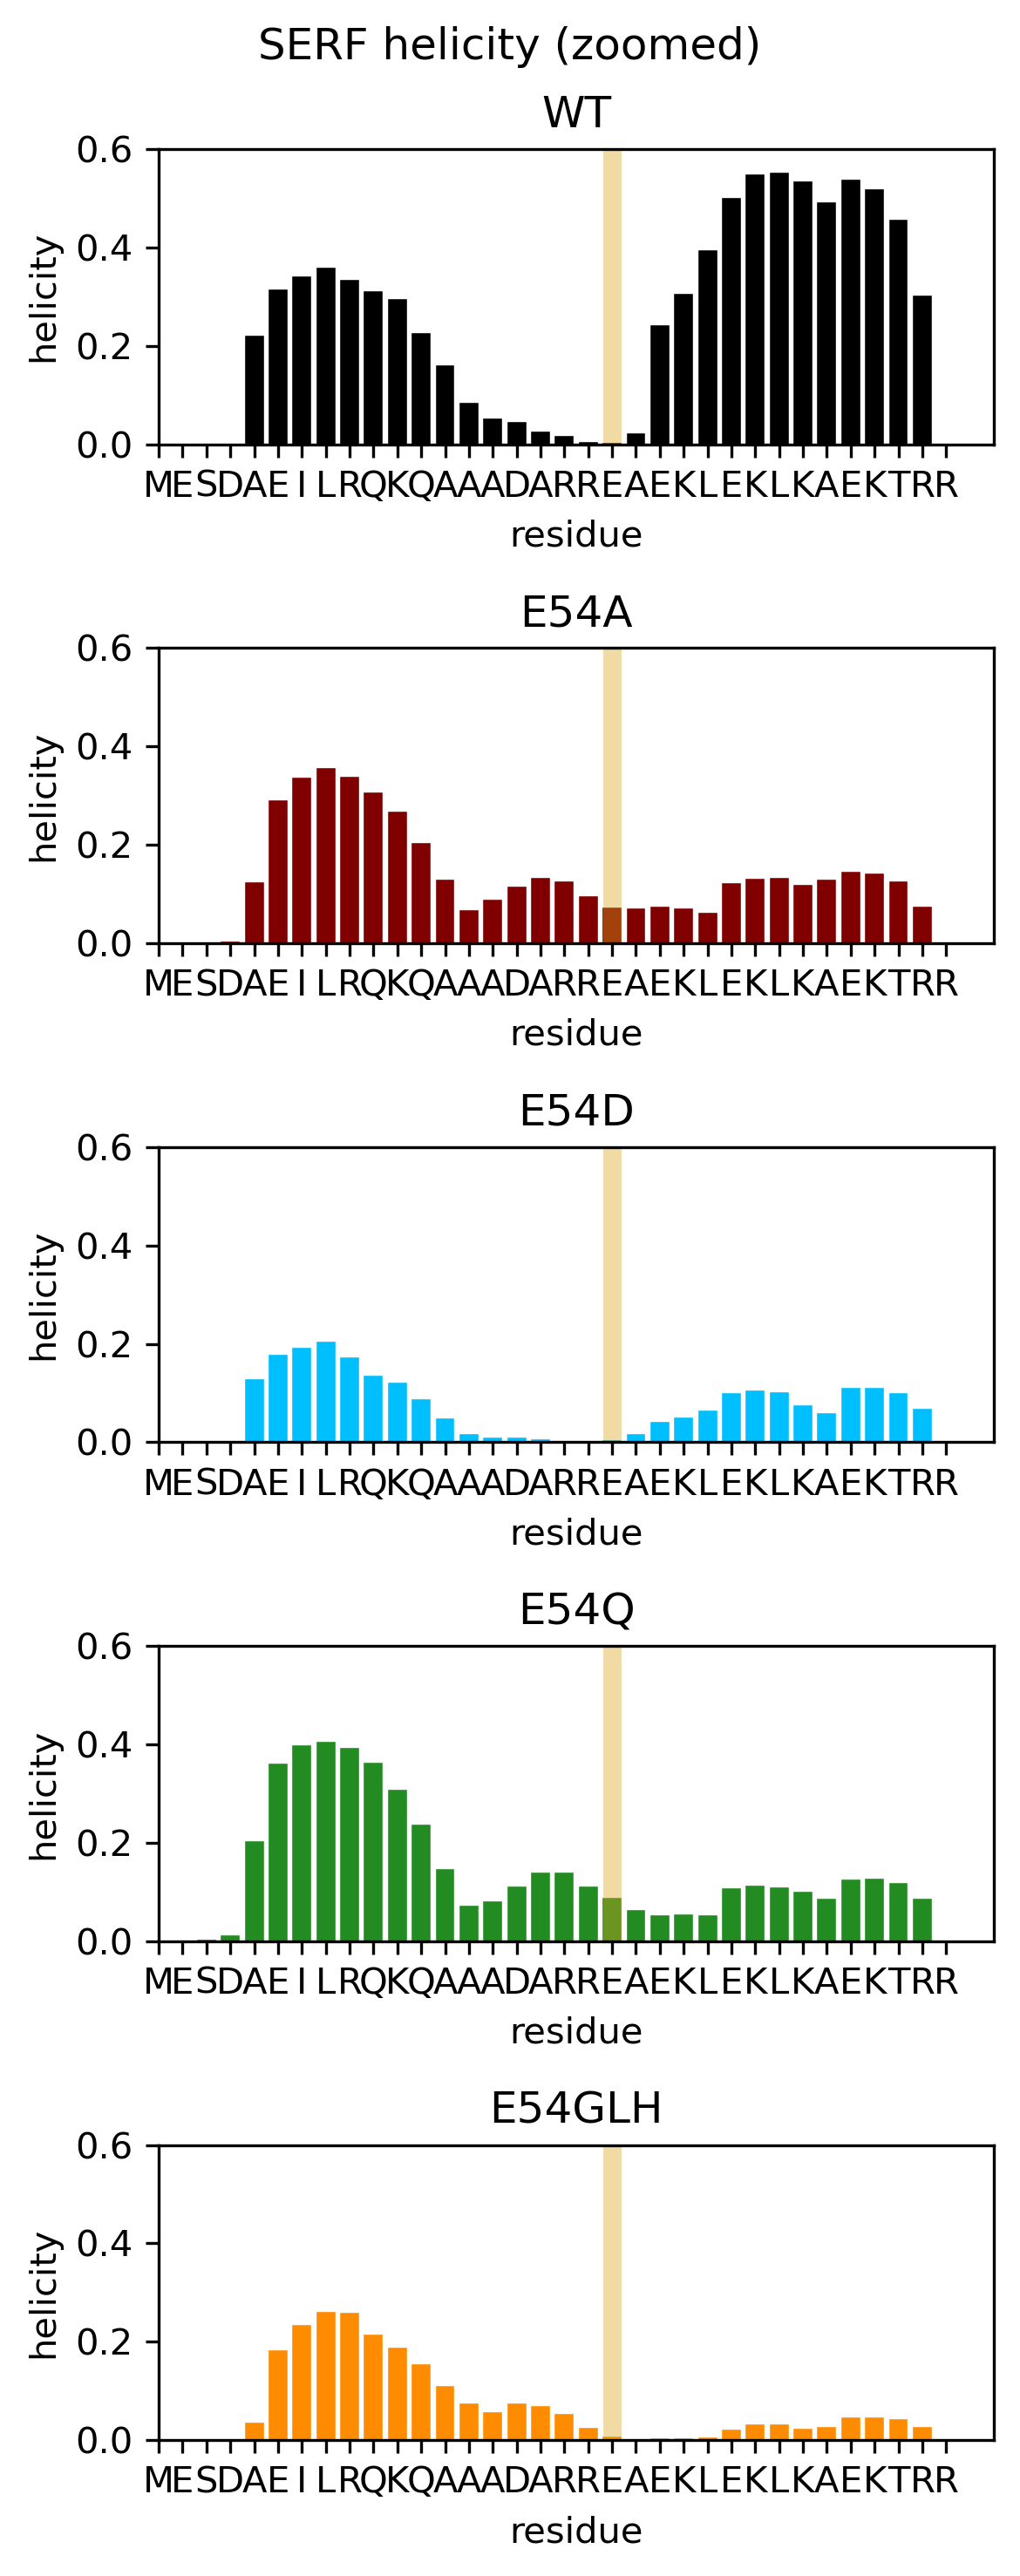

In [9]:
## plot average helical DSSP for each mutant, zoomed in on C-terminus -- generates Figure S9B

f, ax = plt.subplots(5,figsize=(4, 10), dpi = 300)

ax[0].bar(residue[35:68], WT_dssp[35:68], color = 'black', edgecolor = 'white', linewidth = 0.1)
ax[1].bar(residue[35:68], E54A_dssp[35:68], color = 'maroon', edgecolor = 'white', linewidth = 0.1)
ax[2].bar(residue[35:68], E54D_dssp[35:68], color = 'deepskyblue', edgecolor = 'white', linewidth = 0.1)
ax[3].bar(residue[35:68], E54Q_dssp[35:68], color = 'forestgreen', edgecolor = 'white', linewidth = 0.1)
ax[4].bar(residue[35:68], E54GLH_dssp[35:68], color = 'darkorange', edgecolor = 'white', linewidth = 0.1)

ax[0].set_title('WT')
ax[1].set_title('E54A')
ax[2].set_title('E54D')
ax[3].set_title('E54Q')
ax[4].set_title('E54GLH')

ax[0].set_xlabel('residue')
ax[1].set_xlabel('residue')
ax[2].set_xlabel('residue')
ax[3].set_xlabel('residue')
ax[4].set_xlabel('residue')

ax[0].set_ylabel('helicity')
ax[1].set_ylabel('helicity')
ax[2].set_ylabel('helicity')
ax[3].set_ylabel('helicity')
ax[4].set_ylabel('helicity')

ax[0].set_ylim([0, 0.6])
ax[1].set_ylim([0, 0.6])
ax[2].set_ylim([0, 0.6])
ax[3].set_ylim([0, 0.6])
ax[4].set_ylim([0, 0.6])

ax[0].set_xticks(residue, resIDs_to_list)
ax[1].set_xticks(residue, resIDs_to_list)
ax[2].set_xticks(residue, resIDs_to_list)
ax[3].set_xticks(residue, resIDs_to_list)
ax[4].set_xticks(residue, resIDs_to_list)

ax[0].set_xlim([35, 70])
ax[1].set_xlim([35, 70])
ax[2].set_xlim([35, 70])
ax[3].set_xlim([35, 70])
ax[4].set_xlim([35, 70])

# highlight location of E54 in each plot
ax[0].axvline(x = 54, lw = 5, alpha = 0.4, color = 'goldenrod')
ax[1].axvline(x = 54, lw = 5, alpha = 0.4, color = 'goldenrod')
ax[2].axvline(x = 54, lw = 5, alpha = 0.4, color = 'goldenrod')
ax[3].axvline(x = 54, lw = 5, alpha = 0.4, color = 'goldenrod')
ax[4].axvline(x = 54, lw = 5, alpha = 0.4, color = 'goldenrod')

plt.suptitle('SERF helicity (zoomed)')

plt.tight_layout()

## UNCOMMENT below to save figure as PDF
plt.savefig('Figure_S9B_serf_dssp_E54x_zoomed.pdf', format = 'pdf', dpi = 300)
plt.show()